In [1]:
# 모듈 임포트
import requests
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from selenium import webdriver
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image  
import numpy as np
import platform

In [2]:
okt = Okt()

In [3]:
def showWordCloud(tags) :
    # 폰트 설정
    if platform.system() == 'Windows': 
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    # wordcloud 생성

    wc = WordCloud(font_path=path, background_color="white", max_font_size=60, random_state = 52, colormap = 'winter_r')
    cloud = wc.generate_from_frequencies(dict(tags))

    plt.figure(figsize=(18, 14))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

In [4]:
# 민수님 네이버 블로그 검색 함수
def   blog_search(keyword):
    blog_title_text=[]
    noun_list =[]
    counts =[]
    tag =[]
    
    for i in range(1,16):
        wd = webdriver.Chrome('C:/Users/hune1/OneDrive/바탕 화면/FILE/Study/chromedriver')
        main_url =f"https://section.blog.naver.com/Search/Post.naver?pageNo={i}&rangeType=ALL&orderBy=sim&keyword={keyword}" #

        wd.get(main_url)   
        
        html   =   wd.page_source
        soupData =   BeautifulSoup(html,   'html.parser')
        blog_title =   soupData.find_all('span',   {'class':'title'})
        
        for i in range(7):
            blog_title_text.append(blog_title[i].text)
        #print(blog_title_text)
        
        
        for data in blog_title_text:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    if keyword in word:
                        continue
                    elif '여행' in word:
                        continue
                    else :
                        noun_list.append(word)
        wd.quit()
        
    counts   = Counter(noun_list)
    tags   = counts.most_common(40)
    showWordCloud(tags) # tags를 보내 wordcloud 로 보여주는 함수 실행
    plt.figure(figsize = (6, 6)) # 최종 워드 클라우드 사이즈 지정
    print(tags)

C:\Users\hune1\AppData\Local\Temp\ipykernel_27616\1204324726.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('C:/Users/hune1/OneDrive/바탕 화면/FILE/Study/chromedriver')


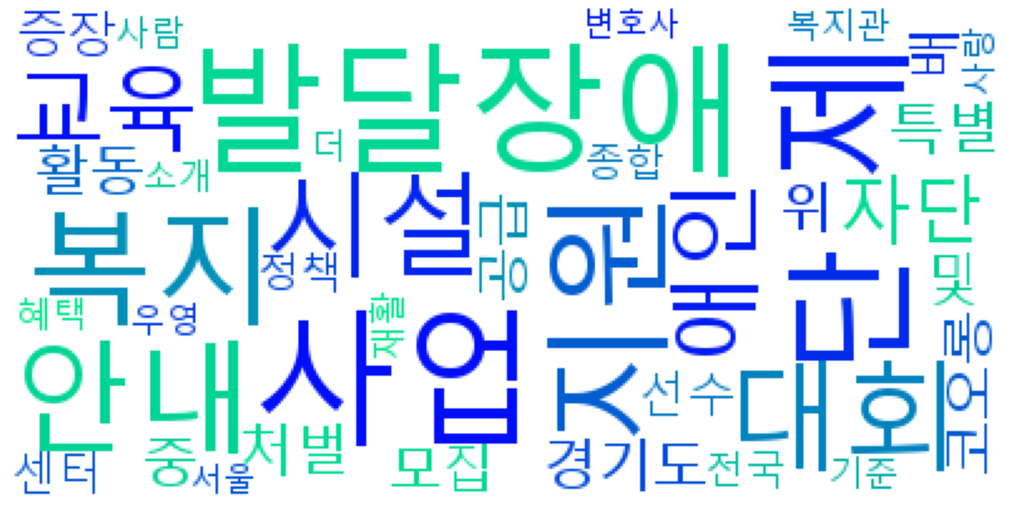

[('제', 96), ('사업', 87), ('발달장애', 85), ('단', 75), ('지원', 70), ('복지', 66), ('안내', 60), ('대회', 58), ('시설', 53), ('교육', 51), ('애인', 50), ('자단', 49), ('경기도', 48), ('및', 47), ('활동', 46), ('코오롱', 46), ('처벌', 45), ('중', 45), ('특별', 44), ('공급', 44), ('모집', 40), ('배', 40), ('위', 40), ('증장', 37), ('선수', 36), ('센터', 35), ('정책', 35), ('전국', 34), ('종합', 32), ('복지관', 32), ('사람', 31), ('사랑', 30), ('혜택', 29), ('기준', 29), ('소개', 29), ('우영', 29), ('재활', 29), ('더', 28), ('변호사', 28), ('서울', 27)]


<Figure size 432x432 with 0 Axes>

In [5]:
blog_search('장애인')